### Exercice 1 - Visualisation des notes des etudiants

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
grades_df = pd.read_csv('../source/student_grades.csv')
grades_df.columns = ['ID','salle','note']
grades_df.head()

,ID,salle,note
0,401767594,3,B-
1,678665086,4,A+
2,678665086,3,A+
3,553725811,2,C
4,678665086,1,B


<Axes: xlabel='note', ylabel='Count'>

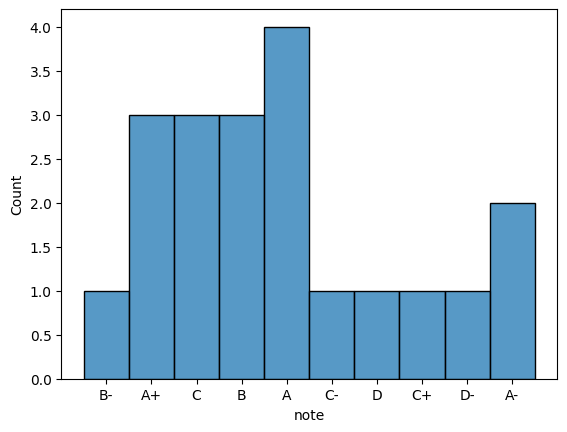

In [6]:
sns.histplot(grades_df.note)

### Exercice 2 - Comparaison des notes en fonction des salles

In [7]:
note_df = pd.DataFrame(grades_df.note.copy())
type(note_df)

pandas.core.frame.DataFrame

In [8]:
letter = 'F E D C B A'
note_dec = letter.split(' ')
new_note_dec = []
for i, ch in enumerate(note_dec):
    new_note_dec.append(ch+'-')
    new_note_dec.append(ch)
    new_note_dec.append(ch+'+')

note_to_index_map = {note: index for index, note in enumerate(new_note_dec)}
note_to_index_map

{'F-': 0,
 'F': 1,
 'F+': 2,
 'E-': 3,
 'E': 4,
 'E+': 5,
 'D-': 6,
 'D': 7,
 'D+': 8,
 'C-': 9,
 'C': 10,
 'C+': 11,
 'B-': 12,
 'B': 13,
 'B+': 14,
 'A-': 15,
 'A': 16,
 'A+': 17}

In [9]:
grades_df['note_dec'] = grades_df['note'].map(note_to_index_map)
grades_df['note_dec'] = grades_df['note_dec']/18 * 20
grades_df['result'] = grades_df['note_dec'] >= 10
grades_df['result'] = grades_df['result'].apply(lambda x : "Réussite" if x is True else "Echec" )
grades_df

,ID,salle,note,note_dec,result
0,401767594,3,B-,13.333333,Réussite
1,678665086,4,A+,18.888889,Réussite
2,678665086,3,A+,18.888889,Réussite
3,553725811,2,C,11.111111,Réussite
4,678665086,1,B,14.444444,Réussite
5,886308195,1,A,17.777778,Réussite
6,103066521,2,C,11.111111,Réussite
7,103066521,3,C-,10.000000,Réussite
8,821568627,4,D,7.777778,Echec
9,821568627,2,A+,18.888889,Réussite


<Axes: xlabel='salle', ylabel='note_dec'>

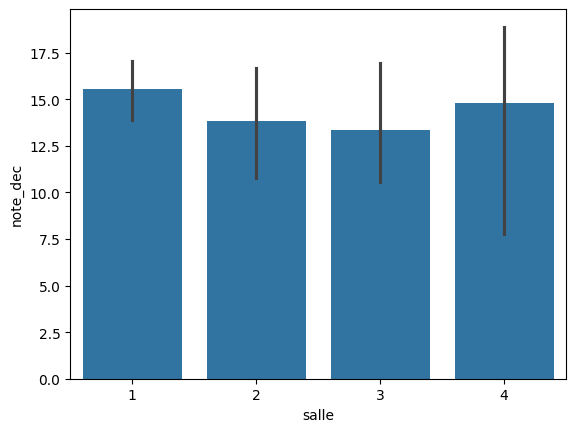

In [10]:
sns.barplot(grades_df, x='salle', y='note_dec')

### Exercice 3 - Comparaison des notes en fonction du statut de reussite

<Axes: xlabel='result', ylabel='Count'>

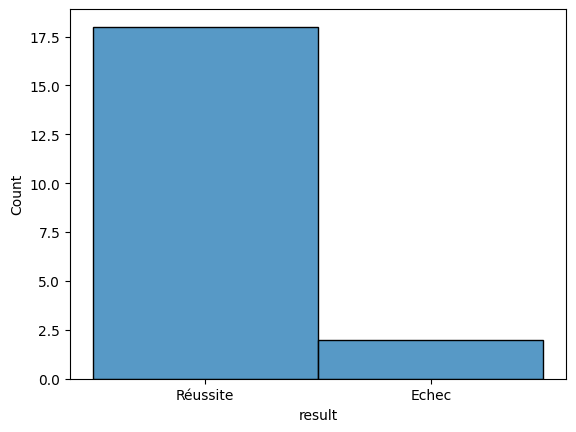

In [11]:
sns.histplot(grades_df, x='result')

### Exercice 4 - Visualisation de la correlation entre les variables

In [13]:
titanic_df = pd.read_csv('../source/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
int_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic_df[int_cols]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


<Axes: >

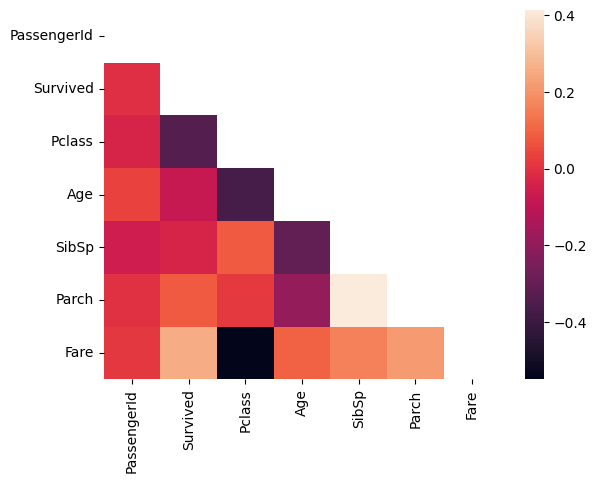

In [20]:
co_mtx = titanic_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(co_mtx, dtype=bool))
sns.heatmap(co_mtx, mask=mask)

### Exercice 5 - Comparaison des tarifs en fonction du statut de survie

<Axes: xlabel='Survived', ylabel='Fare'>

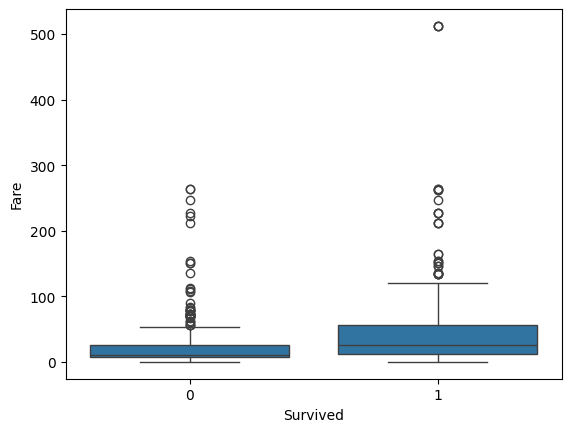

In [25]:
sns.boxplot(titanic_df, x='Survived', y='Fare')

### Exercice 6 - Visualisation des ages des passagers

<Axes: xlabel='Age', ylabel='Count'>

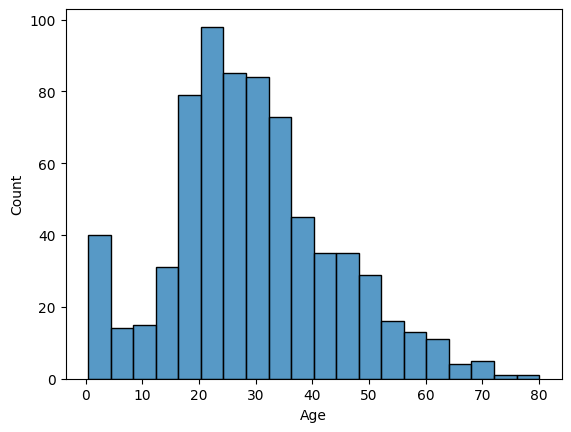

In [26]:
sns.histplot(titanic_df, x='Age')

### Exercice 7 - Comparaison des ages en fonction du statut de survie

<Axes: xlabel='Survived', ylabel='Age'>

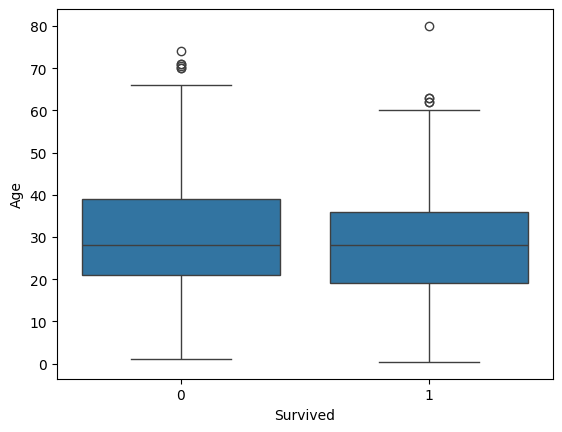

In [27]:
sns.boxplot(titanic_df, x='Survived', y='Age')

### Exercice 8 - Visualisation  de la repartition des tarifs

<Axes: xlabel='Fare', ylabel='Count'>

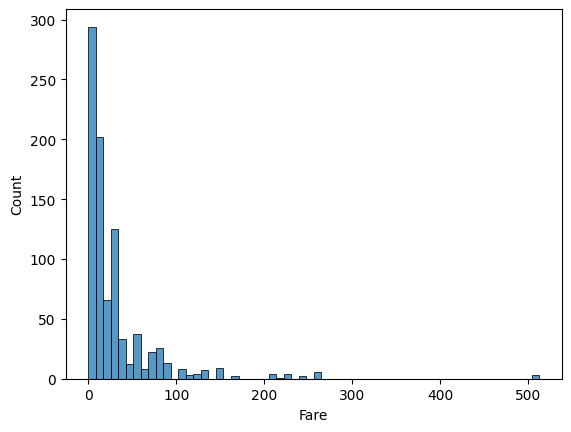

In [29]:
sns.histplot(titanic_df, x='Fare')

### Exercice 9 - Comparaison des tarifs en fonction de la classe

<Axes: xlabel='Pclass', ylabel='Fare'>

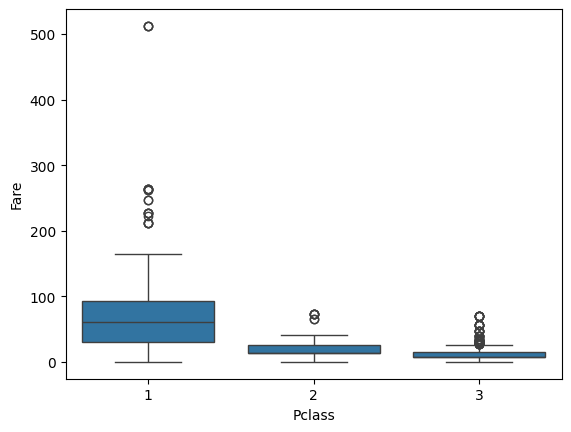

In [31]:
sns.boxplot(titanic_df, x='Pclass', y='Fare')

### Exercice 10 - Visualisation de la repartition du genre des passagers

<Axes: xlabel='Sex', ylabel='Count'>

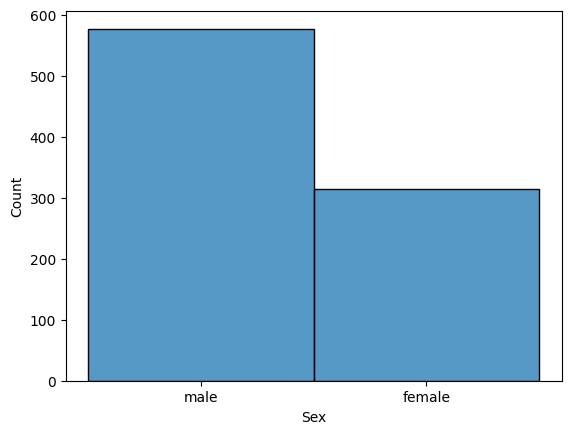

In [32]:
sns.histplot(titanic_df, x='Sex')

### Exercice 11 - Comparaison des ages des etudiants en fonction du statut de reussite

In [35]:
sales_df = pd.read_csv('../source/sales_data.csv')
sales_df.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [39]:
ca = sales_df.Revenue.sum()
ca

np.int64(85271008)

In [67]:
top_5 = pd.DataFrame(sales_df.Product.value_counts()[:5])
top_5

,count
Product,
Water Bottle - 30 oz.,10794
Patch Kit/8 Patches,10416
Mountain Tire Tube,6816
AWC Logo Cap,4358
"Sport-100 Helmet, Red",4220


<Axes: xlabel='Product', ylabel='count'>

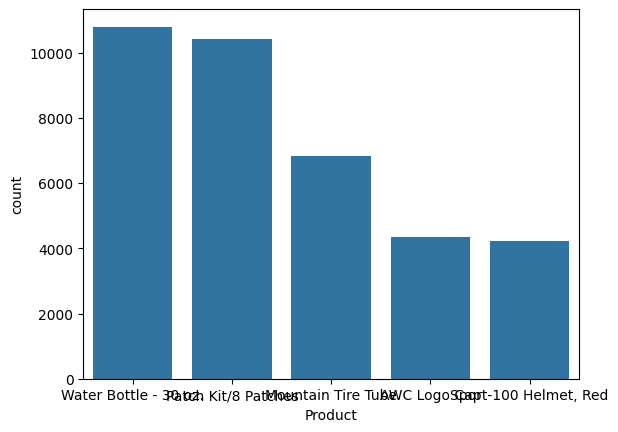

In [69]:
sns.barplot(top_5, x='Product', y='count')

### Exercice 12 - Visualisation de la repartition des notes des etudiants

<Axes: xlabel='note_dec', ylabel='Count'>

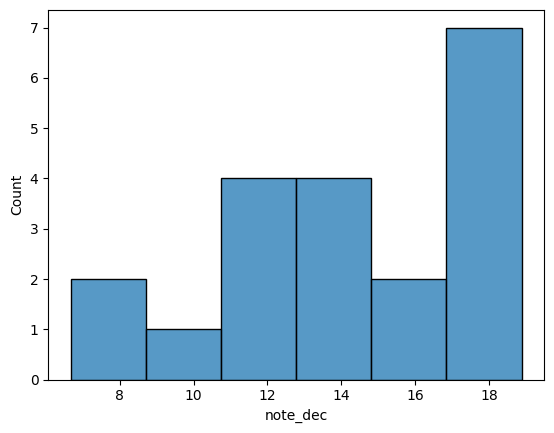

In [78]:
sns.histplot(grades_df, x='note_dec')

### Exercice 13 - Comparaison des notes des etudiants en fonction de la salle

<Axes: xlabel='salle', ylabel='note_dec'>

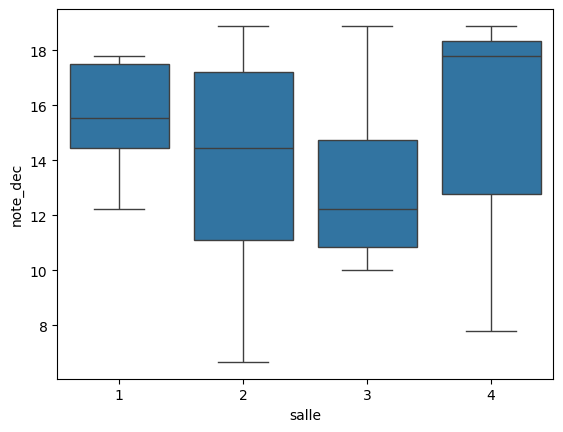

In [79]:
sns.boxplot(grades_df, x='salle', y='note_dec')

### Exercice 14 - Visualisation des tarifs des passagers en fonction de la classe

<Axes: xlabel='Pclass', ylabel='Fare'>

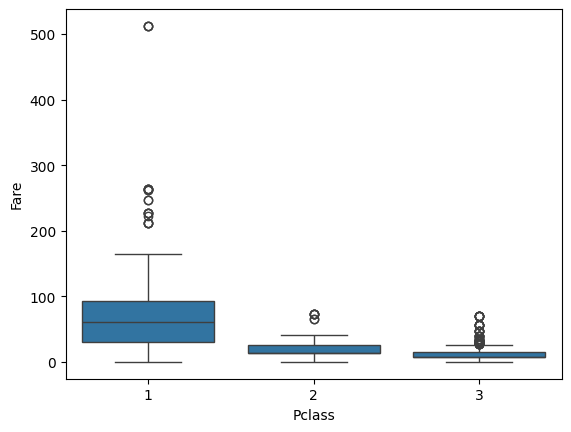

In [83]:
sns.boxplot(titanic_df, x='Pclass', y='Fare')

### Exercice 15 - Comparaison des tarifs des passagers en fonction du port d embarquement

<Axes: xlabel='Embarked', ylabel='Fare'>

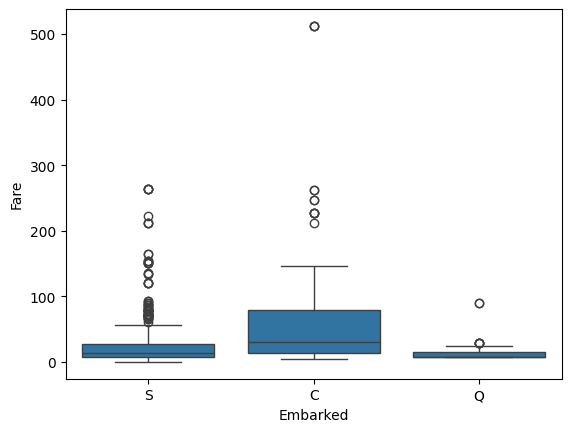

In [89]:
sns.boxplot(titanic_df, x='Embarked', y='Fare' )

### Exercice 16 - Visualisation de la repartition des tarifs des passagers

<Axes: xlabel='Fare', ylabel='Count'>

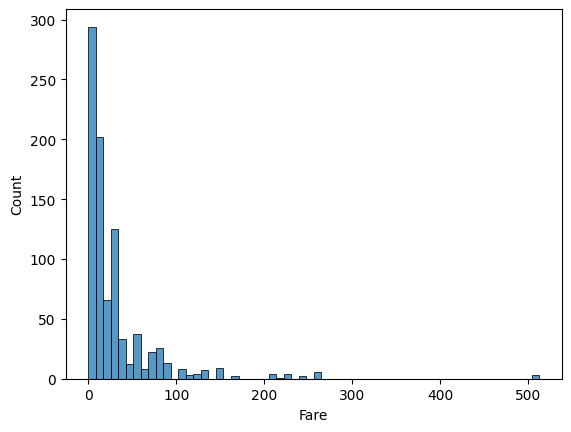

In [90]:
sns.histplot(titanic_df, x='Fare')

### Exercice 17 - Comparaison des tarifs des passagers en fonction du sexe

<Axes: xlabel='Sex', ylabel='Fare'>

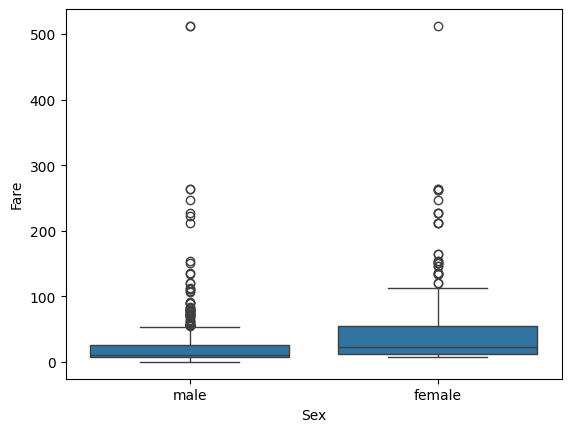

In [92]:
sns.boxplot(titanic_df, x='Sex', y='Fare')

### Exercice 18 - Visualisation des tarifs des passagers en fonction du statut de survie

<Axes: xlabel='Survived', ylabel='Fare'>

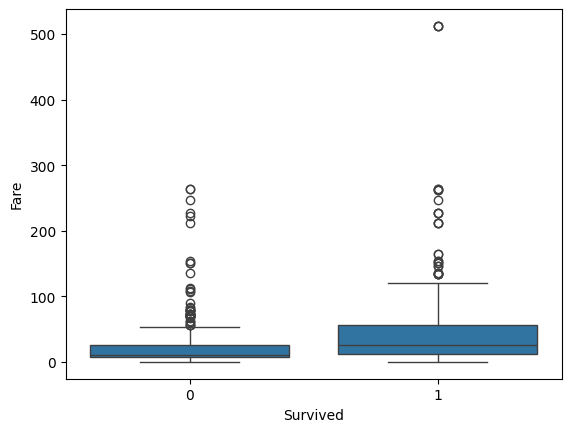

In [96]:
sns.boxplot(titanic_df, x='Survived', y='Fare')

### Exercice 19 - Comparaison des ages des passagers en fonction du port d embarquement

<Axes: xlabel='Embarked', ylabel='Fare'>

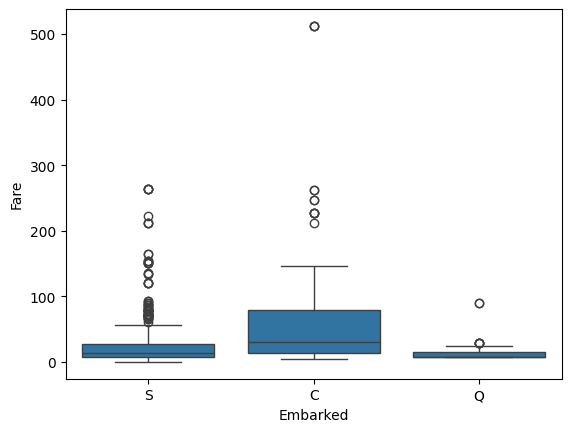

In [99]:
sns.boxplot(titanic_df, x='Embarked', y='Fare')

### Exercice 20 - Visualisation de la repartition des ages des passagers

<Axes: xlabel='Age', ylabel='Count'>

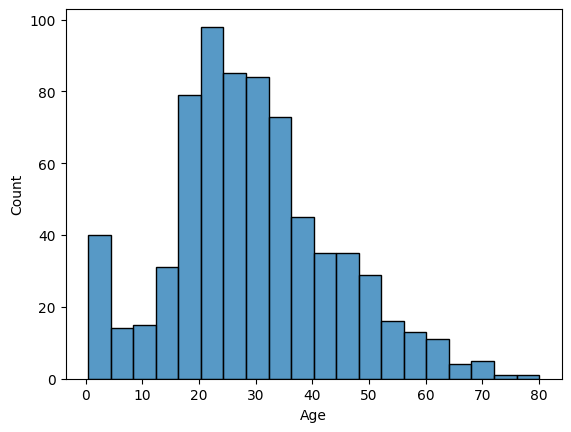

In [101]:
sns.histplot(titanic_df, x='Age')